# 사용라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# 한글폰트 사용을 위한 코드
from matplotlib import rc, font_manager
%matplotlib inline

# 한글폰트 사용을 위한 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [6]:
ls

commerce.xlsx
flow_age_201902.CSV
flow_age_201903.CSV
flow_age_201904.CSV
flow_age_201905.CSV
flow_age_202002.CSV
flow_age_202003.CSV
flow_age_202004.CSV
flow_age_202005.CSV
flow_time_201902.CSV
flow_time_201903.CSV
flow_time_201904.CSV
flow_time_201905.CSV
flow_time_202002.CSV
flow_time_202003.CSV
flow_time_202004.CSV
flow_time_202005.CSV
foreign_card_spent.txt
resident_card_spent.txt
sell_index_geography.xlsx
sell_index_industry.xlsx
sell_index_total.xlsx
shipping3.ipynb
shipping_2.ipynb
shipping_data.ipynb
sns.csv
stat_154001.xls
stat_154002.xls
stat_154003.xls
체력_유지_방법_20200921205316.xlsx
체력_유지_방법_20200921205525.csv
아동청소년 건강.ipynb
체력유지방법.ipynb


# 결측치 확인

In [11]:
df = pd.read_csv("./체력_유지_방법_20200921205525.csv", encoding="cp949")

In [14]:
df.isnull().sum()

통계분류(1)    0
통계분류(2)    0
통계분류(3)    0
2019       0
2019.1     0
2019.2     0
2019.3     0
dtype: int64

# 전처리
###  '전체', '지역별', '도시규모별', '성별', '연령별', '성별 연령별', '학력별', '직업별', '소득별' df로 분리
 `whole, region, city, sex, age, sex_age, academic, job, income`


In [15]:
df

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
0,통계분류(1),통계분류(2),통계분류(3),규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
1,전체,소계,소계,35.2,32.8,29.9,2.1
2,지역별,서울,소계,35,35.9,26.2,2.9
3,지역별,부산,소계,44.2,25.7,29.8,0.3
4,지역별,대구,소계,31.2,30.9,37.4,0.5
...,...,...,...,...,...,...,...
71,소득별,400~450만원미만,소계,35.5,34.2,29,1.3
72,소득별,450~500만원미만,소계,32,35.8,29.6,2.6
73,소득별,500~550만원미만,소계,33.5,34.9,30.8,0.8
74,소득별,550~600만원미만,소계,26.9,38.2,32.5,2.4


In [18]:
df.columns

Index(['통계분류(1)', '통계분류(2)', '통계분류(3)', '2019', '2019.1', '2019.2', '2019.3'], dtype='object')

In [42]:
df.columns = ['분류방법', '분류방법2', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']
df.head()

,분류방법,분류방법2,나이,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,통계분류(1),통계분류(2),통계분류(3),규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
1,전체,소계,소계,35.2,32.8,29.9,2.1
2,지역별,서울,소계,35,35.9,26.2,2.9
3,지역별,부산,소계,44.2,25.7,29.8,0.3
4,지역별,대구,소계,31.2,30.9,37.4,0.5


In [165]:
# df['규칙적인 식사 및 영양보충'] = pd.to_numeric(df['규칙적인 식사 및 영양보충'])
# df['충분한 휴식 및 수면'] = pd.to_numeric(df['충분한 휴식 및 수면'])
# df['규칙적인 체육활동'] = pd.to_numeric(df['규칙적인 체육활동'])
# df['금주 및 금연'] = pd.to_numeric(df['금주 및 금연'])

ValueError: Unable to parse string "규칙적인 식사 및 영양보충" at position 0

In [25]:
df['통계분류(1)'].unique()

array(['통계분류(1)', '전체', '지역별', '도시규모별', '성별', '연령별', '성별 연령별', '학력별',
       '직업별', '소득별'], dtype=object)

In [37]:
whole = df[df['통계분류(1)'] == '전체']
region = df[df['통계분류(1)'] == '지역별']
city = df[df['통계분류(1)'] == '도시규모별']
sex = df[df['통계분류(1)'] == '성별']
age = df[df['통계분류(1)'] == '연령별']
sex_age = df[df['통계분류(1)'] == '성별 연령별']
academic = df[df['통계분류(1)'] == '학력별']
job = df[df['통계분류(1)'] == '직업별']
income = df[df['통계분류(1)'] == '소득별']

In [45]:
region.columns =['분류방법', '지역', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']
region.head()

,분류방법,지역,나이,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
2,지역별,서울,소계,35,35.9,26.2,2.9
3,지역별,부산,소계,44.2,25.7,29.8,0.3
4,지역별,대구,소계,31.2,30.9,37.4,0.5
5,지역별,인천,소계,40.9,28.2,26.9,4
6,지역별,광주,소계,43.8,34.5,20.7,1


In [49]:
region.drop(['분류방법', '나이'], axis='columns', inplace=True)

KeyError: "['분류방법' '나이'] not found in axis"

In [111]:
region.reset_index(drop=True)

,지역,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,서울,35,35.9,26.2,2.9
1,부산,44.2,25.7,29.8,0.3
2,대구,31.2,30.9,37.4,0.5
3,인천,40.9,28.2,26.9,4
4,광주,43.8,34.5,20.7,1
5,대전,34.3,36.8,27.4,1.5
6,울산,37,36.1,26,0.9
7,세종,30.1,39.1,30.8,0
8,경기,33.2,35.3,29.2,2.3
9,강원,34.9,25.3,39,0.7


In [52]:
city

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
19,도시규모별,대도시,소계,37.3,32.9,27.7,2.1
20,도시규모별,중소도시,소계,33.3,32.4,32.2,2.1
21,도시규모별,읍 면 이하,소계,34.4,33.2,30.3,2.1


In [59]:
city = city.drop(['통계분류(1)', '통계분류(3)'], axis='columns', inplace=False)

In [60]:
city

,통계분류(2),2019,2019.1,2019.2,2019.3
19,대도시,37.3,32.9,27.7,2.1
20,중소도시,33.3,32.4,32.2,2.1
21,읍 면 이하,34.4,33.2,30.3,2.1


In [109]:
city.reset_index(drop=True)

,도시규모,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,대도시,37.3,32.9,27.7,2.1
1,중소도시,33.3,32.4,32.2,2.1
2,읍 면 이하,34.4,33.2,30.3,2.1


In [62]:
city.columns =['도시규모', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']
city

,도시규모,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
19,대도시,37.3,32.9,27.7,2.1
20,중소도시,33.3,32.4,32.2,2.1
21,읍 면 이하,34.4,33.2,30.3,2.1


In [78]:
sex = df[df['분류방법'] == '성별']
sex

,분류방법,분류방법2,나이,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
22,성별,남자,소계,34.9,29.6,32.2,3.3
23,성별,여자,소계,35.5,36,27.5,1


In [79]:
sex.columns =['분류방법','성별', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']

In [80]:
sex.drop(['분류방법', '나이'], axis='columns', inplace=True)

In [81]:
sex

,성별,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
22,남자,34.9,29.6,32.2,3.3
23,여자,35.5,36,27.5,1


In [110]:
sex.reset_index(drop=True)

,성별,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,남자,34.9,29.6,32.2,3.3
1,여자,35.5,36,27.5,1


In [82]:
age

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
24,연령별,10대,소계,39,36.7,23.5,0.9
25,연령별,20대,소계,27.7,31.5,38.6,2.2
26,연령별,30대,소계,35.4,35.9,26.6,2.2
27,연령별,40대,소계,34,34.3,29.8,1.9
28,연령별,50대,소계,36.9,30.3,30.2,2.6
29,연령별,60대,소계,34.7,29.2,33.3,2.8
30,연령별,70대 이상,소계,41.4,32.4,24.4,1.8


In [83]:
age.columns = ['분류방법','연령대', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']

In [84]:
age.drop(['분류방법', '나이'], axis='columns', inplace=True)

In [108]:
age.reset_index(drop=True)

,연령대,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,10대,39,36.7,23.5,0.9
1,20대,27.7,31.5,38.6,2.2
2,30대,35.4,35.9,26.6,2.2
3,40대,34,34.3,29.8,1.9
4,50대,36.9,30.3,30.2,2.6
5,60대,34.7,29.2,33.3,2.8
6,70대 이상,41.4,32.4,24.4,1.8


In [169]:
age['규칙적인 식사 및 영양보충'] = pd.to_numeric(age['규칙적인 식사 및 영양보충'])
age['충분한 휴식 및 수면'] = pd.to_numeric(age['충분한 휴식 및 수면'])
age['규칙적인 체육활동'] = pd.to_numeric(age['규칙적인 체육활동'])
age['금주 및 금연'] = pd.to_numeric(age['금주 및 금연'])

In [170]:
age.dtypes

연령대                object
규칙적인 식사 및 영양보충    float64
충분한 휴식 및 수면       float64
규칙적인 체육활동         float64
금주 및 금연           float64
dtype: object

In [86]:
sex_age

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
31,성별 연령별,남성,10대,42.5,31.6,25,0.8
32,성별 연령별,남성,20대,25.1,27.8,44.2,2.8
33,성별 연령별,남성,30대,37.1,32.5,26.5,3.9
34,성별 연령별,남성,40대,35.6,30.7,30.7,3.1
35,성별 연령별,남성,50대,33.7,28.3,33.9,4.1
36,성별 연령별,남성,60대,34.8,25.6,35.4,4.1
37,성별 연령별,남성,70대이상,40.4,31,25.5,3.1
38,성별 연령별,여성,10대,35.2,42.1,21.8,0.9
39,성별 연령별,여성,20대,30.6,35.7,32.2,1.5
40,성별 연령별,여성,30대,33.5,39.6,26.6,0.3


In [92]:
sex_age.columns = ['분류방법','성별', '연령대', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']

In [107]:
sex_age.reset_index(drop=True)

,성별,연령대,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,남성,10대,42.5,31.6,25,0.8
1,남성,20대,25.1,27.8,44.2,2.8
2,남성,30대,37.1,32.5,26.5,3.9
3,남성,40대,35.6,30.7,30.7,3.1
4,남성,50대,33.7,28.3,33.9,4.1
5,남성,60대,34.8,25.6,35.4,4.1
6,남성,70대이상,40.4,31,25.5,3.1
7,여성,10대,35.2,42.1,21.8,0.9
8,여성,20대,30.6,35.7,32.2,1.5
9,여성,30대,33.5,39.6,26.6,0.3


In [94]:
sex_age.drop(['분류방법'], axis='columns', inplace=True)

In [106]:
sex_age.reset_index(drop=True)

,성별,연령대,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,남성,10대,42.5,31.6,25,0.8
1,남성,20대,25.1,27.8,44.2,2.8
2,남성,30대,37.1,32.5,26.5,3.9
3,남성,40대,35.6,30.7,30.7,3.1
4,남성,50대,33.7,28.3,33.9,4.1
5,남성,60대,34.8,25.6,35.4,4.1
6,남성,70대이상,40.4,31,25.5,3.1
7,여성,10대,35.2,42.1,21.8,0.9
8,여성,20대,30.6,35.7,32.2,1.5
9,여성,30대,33.5,39.6,26.6,0.3


In [39]:
academic

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
45,학력별,초졸이하,소계,38.7,33.2,27.5,0.6
46,학력별,중졸,소계,38.9,33.9,25.5,1.6
47,학력별,고졸,소계,36.2,31.2,30.2,2.4
48,학력별,대졸(4년제미만),소계,37.3,34,26.8,1.9
49,학력별,대졸(4년제이상),소계,29.5,33.8,34.1,2.5
50,학력별,대학원이상,소계,29.5,26.2,42.4,1.9


In [96]:
academic.columns = ['분류방법','학력', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']
academic.drop(['분류방법', '나이'], axis='columns', inplace=True)

In [105]:
academic.reset_index(drop=True)

,학력,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,초졸이하,38.7,33.2,27.5,0.6
1,중졸,38.9,33.9,25.5,1.6
2,고졸,36.2,31.2,30.2,2.4
3,대졸(4년제미만),37.3,34,26.8,1.9
4,대졸(4년제이상),29.5,33.8,34.1,2.5
5,대학원이상,29.5,26.2,42.4,1.9


In [38]:
job

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
51,직업별,관리자,소계,27,29,40.3,3.6
52,직업별,전문가및관련종사자,소계,23.8,36,38.9,1.3
53,직업별,사무종사자,소계,32.5,32.1,32.3,3.2
54,직업별,서비스종사자,소계,39.1,29.6,29.7,1.5
55,직업별,판매종사자,소계,38.8,32.5,26.6,2.1
56,직업별,농림어업숙련종사자,소계,39.3,27.3,29.8,3.6
57,직업별,기능원및관련기능,소계,33.5,34.9,27.4,4.2
58,직업별,장치/기계조작및조립,소계,19.6,31.2,40.9,8.3
59,직업별,단순노무종사자,소계,34.1,34.4,30.2,1.3
60,직업별,군인,소계,0,0,100,0


In [98]:
job.columns = ['분류방법','직업', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']
job.drop(['분류방법', '나이'], axis='columns', inplace=True)
job

,직업,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
51,관리자,27,29,40.3,3.6
52,전문가및관련종사자,23.8,36,38.9,1.3
53,사무종사자,32.5,32.1,32.3,3.2
54,서비스종사자,39.1,29.6,29.7,1.5
55,판매종사자,38.8,32.5,26.6,2.1
56,농림어업숙련종사자,39.3,27.3,29.8,3.6
57,기능원및관련기능,33.5,34.9,27.4,4.2
58,장치/기계조작및조립,19.6,31.2,40.9,8.3
59,단순노무종사자,34.1,34.4,30.2,1.3
60,군인,0,0,100,0


In [104]:
job.reset_index(drop=True)

,직업,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,관리자,27,29,40.3,3.6
1,전문가및관련종사자,23.8,36,38.9,1.3
2,사무종사자,32.5,32.1,32.3,3.2
3,서비스종사자,39.1,29.6,29.7,1.5
4,판매종사자,38.8,32.5,26.6,2.1
5,농림어업숙련종사자,39.3,27.3,29.8,3.6
6,기능원및관련기능,33.5,34.9,27.4,4.2
7,장치/기계조작및조립,19.6,31.2,40.9,8.3
8,단순노무종사자,34.1,34.4,30.2,1.3
9,군인,0,0,100,0


In [172]:
job['규칙적인 식사 및 영양보충'] = pd.to_numeric(job['규칙적인 식사 및 영양보충'])
job['충분한 휴식 및 수면'] = pd.to_numeric(job['충분한 휴식 및 수면'])
job['규칙적인 체육활동'] = pd.to_numeric(job['규칙적인 체육활동'])
job['금주 및 금연'] = pd.to_numeric(job['금주 및 금연'])

In [40]:
income

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
64,소득별,100만원미만,소계,40.8,24.7,33.3,1.2
65,소득별,100~150만원미만,소계,34.9,35.6,27.1,2.3
66,소득별,150~200만원미만,소계,38.2,30.7,28.8,2.3
67,소득별,200~250만원미만,소계,35.3,33.6,29.2,1.9
68,소득별,250~300만원미만,소계,43.8,26,27.4,2.9
69,소득별,300~350만원미만,소계,43.2,26.2,27.9,2.6
70,소득별,350~400만원미만,소계,35.6,30.8,30.5,3
71,소득별,400~450만원미만,소계,35.5,34.2,29,1.3
72,소득별,450~500만원미만,소계,32,35.8,29.6,2.6
73,소득별,500~550만원미만,소계,33.5,34.9,30.8,0.8


In [99]:
income.columns = ['분류방법','소득', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']
income.drop(['분류방법', '나이'], axis='columns', inplace=True)
income

,소득,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
64,100만원미만,40.8,24.7,33.3,1.2
65,100~150만원미만,34.9,35.6,27.1,2.3
66,150~200만원미만,38.2,30.7,28.8,2.3
67,200~250만원미만,35.3,33.6,29.2,1.9
68,250~300만원미만,43.8,26,27.4,2.9
69,300~350만원미만,43.2,26.2,27.9,2.6
70,350~400만원미만,35.6,30.8,30.5,3
71,400~450만원미만,35.5,34.2,29,1.3
72,450~500만원미만,32,35.8,29.6,2.6
73,500~550만원미만,33.5,34.9,30.8,0.8


In [103]:
income.reset_index(drop=True)

,소득,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
0,100만원미만,40.8,24.7,33.3,1.2
1,100~150만원미만,34.9,35.6,27.1,2.3
2,150~200만원미만,38.2,30.7,28.8,2.3
3,200~250만원미만,35.3,33.6,29.2,1.9
4,250~300만원미만,43.8,26,27.4,2.9
5,300~350만원미만,43.2,26.2,27.9,2.6
6,350~400만원미만,35.6,30.8,30.5,3
7,400~450만원미만,35.5,34.2,29,1.3
8,450~500만원미만,32,35.8,29.6,2.6
9,500~550만원미만,33.5,34.9,30.8,0.8


In [173]:
income['규칙적인 식사 및 영양보충'] = pd.to_numeric(income['규칙적인 식사 및 영양보충'])
income['충분한 휴식 및 수면'] = pd.to_numeric(income['충분한 휴식 및 수면'])
income['규칙적인 체육활동'] = pd.to_numeric(income['규칙적인 체육활동'])
income['금주 및 금연'] = pd.to_numeric(income['금주 및 금연'])

In [113]:
whole

,통계분류(1),통계분류(2),통계분류(3),2019,2019.1,2019.2,2019.3
1,전체,소계,소계,35.2,32.8,29.9,2.1


In [114]:
whole.columns = ['분류방법','소득', '나이', '규칙적인 식사 및 영양보충', '충분한 휴식 및 수면','규칙적인 체육활동', '금주 및 금연']

In [120]:
whole.drop(['분류방법','소득', '나이'], axis='columns', inplace=True)

# 전체 // income, job, age, region

In [122]:
whole

,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
1,35.2,32.8,29.9,2.1


In [133]:
whole.dtypes

규칙적인 식사 및 영양보충    object
충분한 휴식 및 수면       object
규칙적인 체육활동         object
금주 및 금연           object
dtype: object

In [174]:
whole['규칙적인 식사 및 영양보충'] = pd.to_numeric(whole['규칙적인 식사 및 영양보충'])
whole['충분한 휴식 및 수면'] = pd.to_numeric(whole['충분한 휴식 및 수면'])
whole['규칙적인 체육활동'] = pd.to_numeric(whole['규칙적인 체육활동'])
whole['금주 및 금연'] = pd.to_numeric(whole['금주 및 금연'])

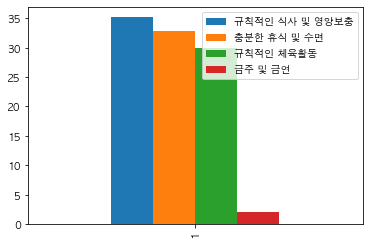

In [176]:
whole.plot(kind='bar')

In [125]:
region

,지역,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
2,서울,35,35.9,26.2,2.9
3,부산,44.2,25.7,29.8,0.3
4,대구,31.2,30.9,37.4,0.5
5,인천,40.9,28.2,26.9,4
6,광주,43.8,34.5,20.7,1
7,대전,34.3,36.8,27.4,1.5
8,울산,37,36.1,26,0.9
9,세종,30.1,39.1,30.8,0
10,경기,33.2,35.3,29.2,2.3
11,강원,34.9,25.3,39,0.7


In [132]:
region.dtypes

지역                object
규칙적인 식사 및 영양보충    object
충분한 휴식 및 수면       object
규칙적인 체육활동         object
금주 및 금연           object
dtype: object

In [150]:
region['규칙적인 식사 및 영양보충'] = pd.to_numeric(region['규칙적인 식사 및 영양보충'])

In [152]:
region['충분한 휴식 및 수면'] = pd.to_numeric(region['충분한 휴식 및 수면'])

In [157]:
region['규칙적인 체육활동'] = pd.to_numeric(region['규칙적인 체육활동'])

In [153]:
region['금주 및 금연'] = pd.to_numeric(region['금주 및 금연'])

In [158]:
region.dtypes

지역                 object
규칙적인 식사 및 영양보충    float64
충분한 휴식 및 수면       float64
규칙적인 체육활동         float64
금주 및 금연           float64
dtype: object

In [182]:
region

,지역,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
2,서울,35.0,35.9,26.2,2.9
3,부산,44.2,25.7,29.8,0.3
4,대구,31.2,30.9,37.4,0.5
5,인천,40.9,28.2,26.9,4.0
6,광주,43.8,34.5,20.7,1.0
7,대전,34.3,36.8,27.4,1.5
8,울산,37.0,36.1,26.0,0.9
9,세종,30.1,39.1,30.8,0.0
10,경기,33.2,35.3,29.2,2.3
11,강원,34.9,25.3,39.0,0.7


## 2019년 지역별/직업별/연령대별 체력유지방법 
### -> '규칙적인 체육활동'의 비율이 압도적으로 높음

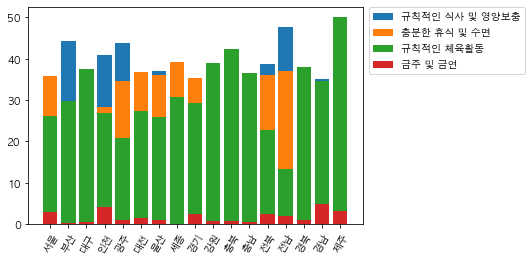

In [215]:
fig, ax = plt.subplots()
ax.bar(region['지역'], region['규칙적인 식사 및 영양보충'], label='규칙적인 식사 및 영양보충')
ax.bar(region['지역'], region['충분한 휴식 및 수면'], label='충분한 휴식 및 수면')
ax.bar(region['지역'], region['규칙적인 체육활동'], label='규칙적인 체육활동' )
ax.bar(region['지역'], region['금주 및 금연'],  label='금주 및 금연')
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

plt.show()

In [209]:
job

,직업,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
51,관리자,27.0,29.0,40.3,3.6
52,전문가및관련종사자,23.8,36.0,38.9,1.3
53,사무종사자,32.5,32.1,32.3,3.2
54,서비스종사자,39.1,29.6,29.7,1.5
55,판매종사자,38.8,32.5,26.6,2.1
56,농림어업숙련종사자,39.3,27.3,29.8,3.6
57,기능원및관련기능,33.5,34.9,27.4,4.2
58,장치/기계조작및조립,19.6,31.2,40.9,8.3
59,단순노무종사자,34.1,34.4,30.2,1.3
60,군인,0.0,0.0,100.0,0.0


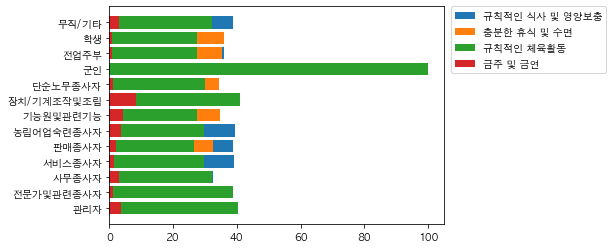

In [214]:
fig, ax = plt.subplots()
ax.barh(job['직업'], job['규칙적인 식사 및 영양보충'], label='규칙적인 식사 및 영양보충')
ax.barh(job['직업'], job['충분한 휴식 및 수면'], label='충분한 휴식 및 수면')
ax.barh(job['직업'], job['규칙적인 체육활동'], label='규칙적인 체육활동' )
ax.barh(job['직업'], job['금주 및 금연'],  label='금주 및 금연')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

plt.show()

In [216]:
age

,연령대,규칙적인 식사 및 영양보충,충분한 휴식 및 수면,규칙적인 체육활동,금주 및 금연
24,10대,39.0,36.7,23.5,0.9
25,20대,27.7,31.5,38.6,2.2
26,30대,35.4,35.9,26.6,2.2
27,40대,34.0,34.3,29.8,1.9
28,50대,36.9,30.3,30.2,2.6
29,60대,34.7,29.2,33.3,2.8
30,70대 이상,41.4,32.4,24.4,1.8


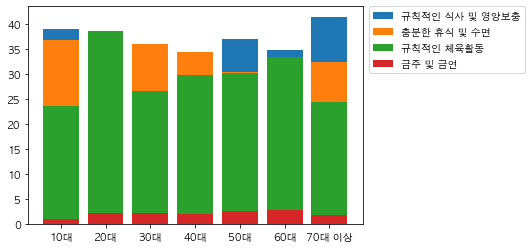

In [220]:
fig, ax = plt.subplots()
ax.bar(age['연령대'], age['규칙적인 식사 및 영양보충'], label='규칙적인 식사 및 영양보충')
ax.bar(age['연령대'], age['충분한 휴식 및 수면'], label='충분한 휴식 및 수면')
ax.bar(age['연령대'], age['규칙적인 체육활동'], label='규칙적인 체육활동' )
ax.bar(age['연령대'], age['금주 및 금연'],  label='금주 및 금연')
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

plt.show()